___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [44]:
#If you want to upload for the jupyter
#df=pd.read_csv("../Data/Frozen_Dessert_Production.csv", parse_dates=True)

In [49]:
# CODE HERE
df_1=pd.read_csv("C:\\Users\\moham\\Downloads\\Frozen_Dessert_Production.csv", parse_dates=True, index_col='DATE')
df_1.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


#note: Here we would convert DATE column to index column so that it would not be involved in the calculations because the dates are str and are not numerics

**Task: Change the column name to Production**

In [5]:
#CODE HERE

In [25]:
df_1.columns=['Date','Production']
df_1.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

<AxesSubplot:>

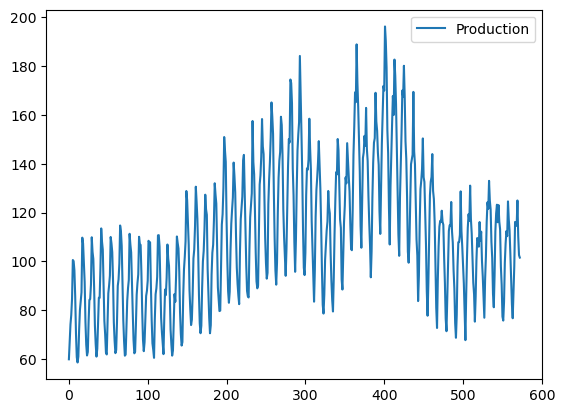

In [26]:
#CODE HERE
df_1.plot()

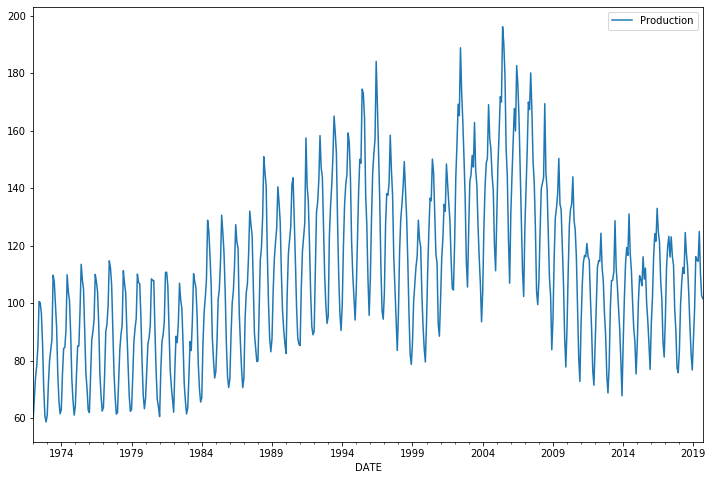

## Train Test Split

**TASK: Figure out the length of the data set**

In [27]:
#CODE HERE
len(df_1)

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [50]:
#CODE HERE
length_of_train=len(df_1)-24
train=df_1.iloc[:length_of_train]

In [51]:
test=df_1.iloc[-24:]

In [52]:
len(test)

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [53]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [56]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [57]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [58]:
len(test)

24

In [59]:
length=12
generator=TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)

What is batch_size?
batch_size is like the number of "mini-groups" of data that the model looks at before it updates itself. Instead of looking at all the data at once (which can be very slow and require a lot of memory), it looks at these smaller groups one at a time.

Example of batch_size
Let's say you have a dataset of 1000 samples. If you set batch_size=1, the model will look at each sample one by one, making 1000 updates. If you set batch_size=10, the model will look at 10 samples at a time, making 100 updates.

length = 10  # Each sequence will be 10 days long
batch_size = 2  # The model will look at 2 sequences at a time

In [60]:
X,y=generator[0]
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
n_features=1

In the context of your code, n_features represents the number of features (or variables) in your dataset that the LSTM (Long Short-Term Memory) network will use as input for each time step. This is crucial when defining the input shape of the LSTM layer, which expects a 3D input with dimensions (number of samples, time steps, number of features).

In [64]:
model=Sequential()
model.add(LSTM(100, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1)) #whic is the out put cell
model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [65]:
# CODE HERE
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=5)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
  1/537 ━━━━━━━━━━━━━━━━━━━━ 20:40 2s/step - loss: 0.0377

C:\Users\moham\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0452 - val_loss: 0.0037
Epoch 2/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0121 - val_loss: 0.0020
Epoch 3/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 4/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 5/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 6/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 7/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 8/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 9/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 10/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 11/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0033 - val_loss: 0.0018
Epoch 12/20
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.

**TASK: Create an EarlyStopping callback based on val_loss.**

In [29]:
#CODE HERE

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [32]:
# CODE HERE

Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


**TASK: Plot the history of the loss that occured during training.**

<AxesSubplot:>

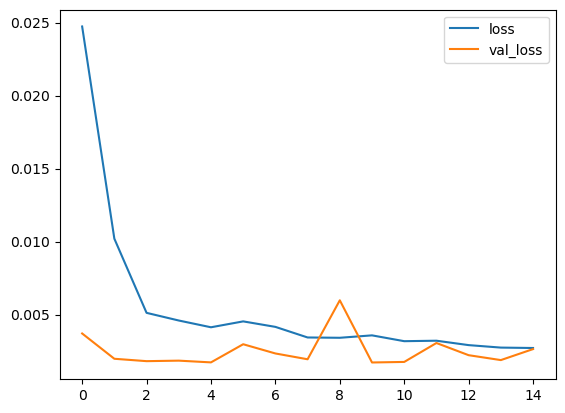

In [66]:
# CODE HERE
losses=pd.DataFrame(model.history.history)
losses.plot()

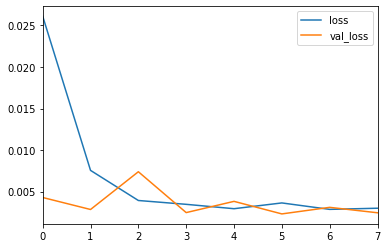

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [67]:
# CODE HERE
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [68]:
true_prediction=scaler.inverse_transform(test_predictions)

In [69]:
test['predictions']=true_prediction
test

C:\Users\moham\AppData\Local\Temp\ipykernel_6448\1535319023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_prediction


,IPN31152N,predictions
DATE,,
2017-10-01,90.4732,87.715553
2017-11-01,77.4378,79.305867
2017-12-01,75.8118,78.291859
2018-01-01,83.4343,88.842253
2018-02-01,99.4899,99.904849
2018-03-01,107.3152,108.209501
2018-04-01,112.4309,112.932199
2018-05-01,110.3544,115.767300
2018-06-01,124.5841,116.589676


C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

<AxesSubplot:xlabel='DATE'>

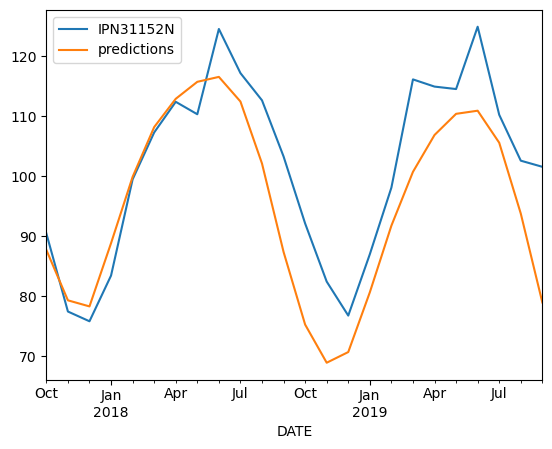

In [70]:
# CODE HERE
test.plot()

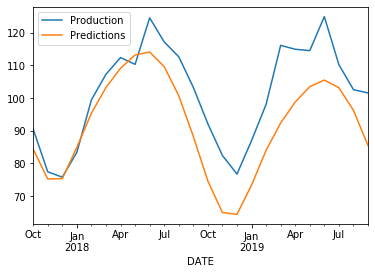

**TASK: Calculate your RMSE.**

In [72]:
#CODE HERE
from sklearn.metrics import mean_squared_error

In [77]:
np.sqrt(mean_squared_error(test['IPN31152N'],test['predictions']))

9.666723452577521